# Importing and Data Preprocessing

In [1]:
!pip install plotly


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:




import numpy as np # linear algebra
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px 
%matplotlib inline

import datetime

import warnings
warnings.filterwarnings('ignore')

In [3]:
# read data
df = pd.read_csv('wines_SPA.csv')
# sanity check
df.head()


,winery,wine,year,rating,num_reviews,country,region,price,type,body,acidity
0,Teso La Monja,Tinto,2013,4.9,58,Espana,Toro,995.00,Toro Red,5.0,3.0
1,Artadi,Vina El Pison,2018,4.9,31,Espana,Vino de Espana,313.50,Tempranillo,4.0,2.0
2,Vega Sicilia,Unico,2009,4.8,1793,Espana,Ribera del Duero,324.95,Ribera Del Duero Red,5.0,3.0
3,Vega Sicilia,Unico,1999,4.8,1705,Espana,Ribera del Duero,692.96,Ribera Del Duero Red,5.0,3.0
4,Vega Sicilia,Unico,1996,4.8,1309,Espana,Ribera del Duero,778.06,Ribera Del Duero Red,5.0,3.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   winery       7500 non-null   object 
 1   wine         7500 non-null   object 
 2   year         7498 non-null   object 
 3   rating       7500 non-null   float64
 4   num_reviews  7500 non-null   int64  
 5   country      7500 non-null   object 
 6   region       7500 non-null   object 
 7   price        7500 non-null   float64
 8   type         6955 non-null   object 
 9   body         6331 non-null   float64
 10  acidity      6331 non-null   float64
dtypes: float64(4), int64(1), object(6)
memory usage: 644.7+ KB


In [5]:
df=df.replace('N.V.', 'NaN')

In [6]:
df.describe()

,rating,num_reviews,price,body,acidity
count,7500.000000,7500.000000,7500.000000,6331.000000,6331.000000
mean,4.254933,451.109067,60.095822,4.158427,2.946612
std,0.118029,723.001856,150.356676,0.583352,0.248202
min,4.200000,25.000000,4.990000,2.000000,1.000000
25%,4.200000,389.000000,18.900000,4.000000,3.000000
50%,4.200000,404.000000,28.530000,4.000000,3.000000
75%,4.200000,415.000000,51.350000,5.000000,3.000000
max,4.900000,32624.000000,3119.080000,5.000000,3.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   winery       7500 non-null   object 
 1   wine         7500 non-null   object 
 2   year         7498 non-null   object 
 3   rating       7500 non-null   float64
 4   num_reviews  7500 non-null   int64  
 5   country      7500 non-null   object 
 6   region       7500 non-null   object 
 7   price        7500 non-null   float64
 8   type         6955 non-null   object 
 9   body         6331 non-null   float64
 10  acidity      6331 non-null   float64
dtypes: float64(4), int64(1), object(6)
memory usage: 644.7+ KB


In [8]:
df['year']=pd.to_datetime(df['year'])

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   winery       7500 non-null   object        
 1   wine         7500 non-null   object        
 2   year         7210 non-null   datetime64[ns]
 3   rating       7500 non-null   float64       
 4   num_reviews  7500 non-null   int64         
 5   country      7500 non-null   object        
 6   region       7500 non-null   object        
 7   price        7500 non-null   float64       
 8   type         6955 non-null   object        
 9   body         6331 non-null   float64       
 10  acidity      6331 non-null   float64       
dtypes: datetime64[ns](1), float64(4), int64(1), object(5)
memory usage: 644.7+ KB


In [10]:
df['year']=df['year'].dt.year

# Visualization

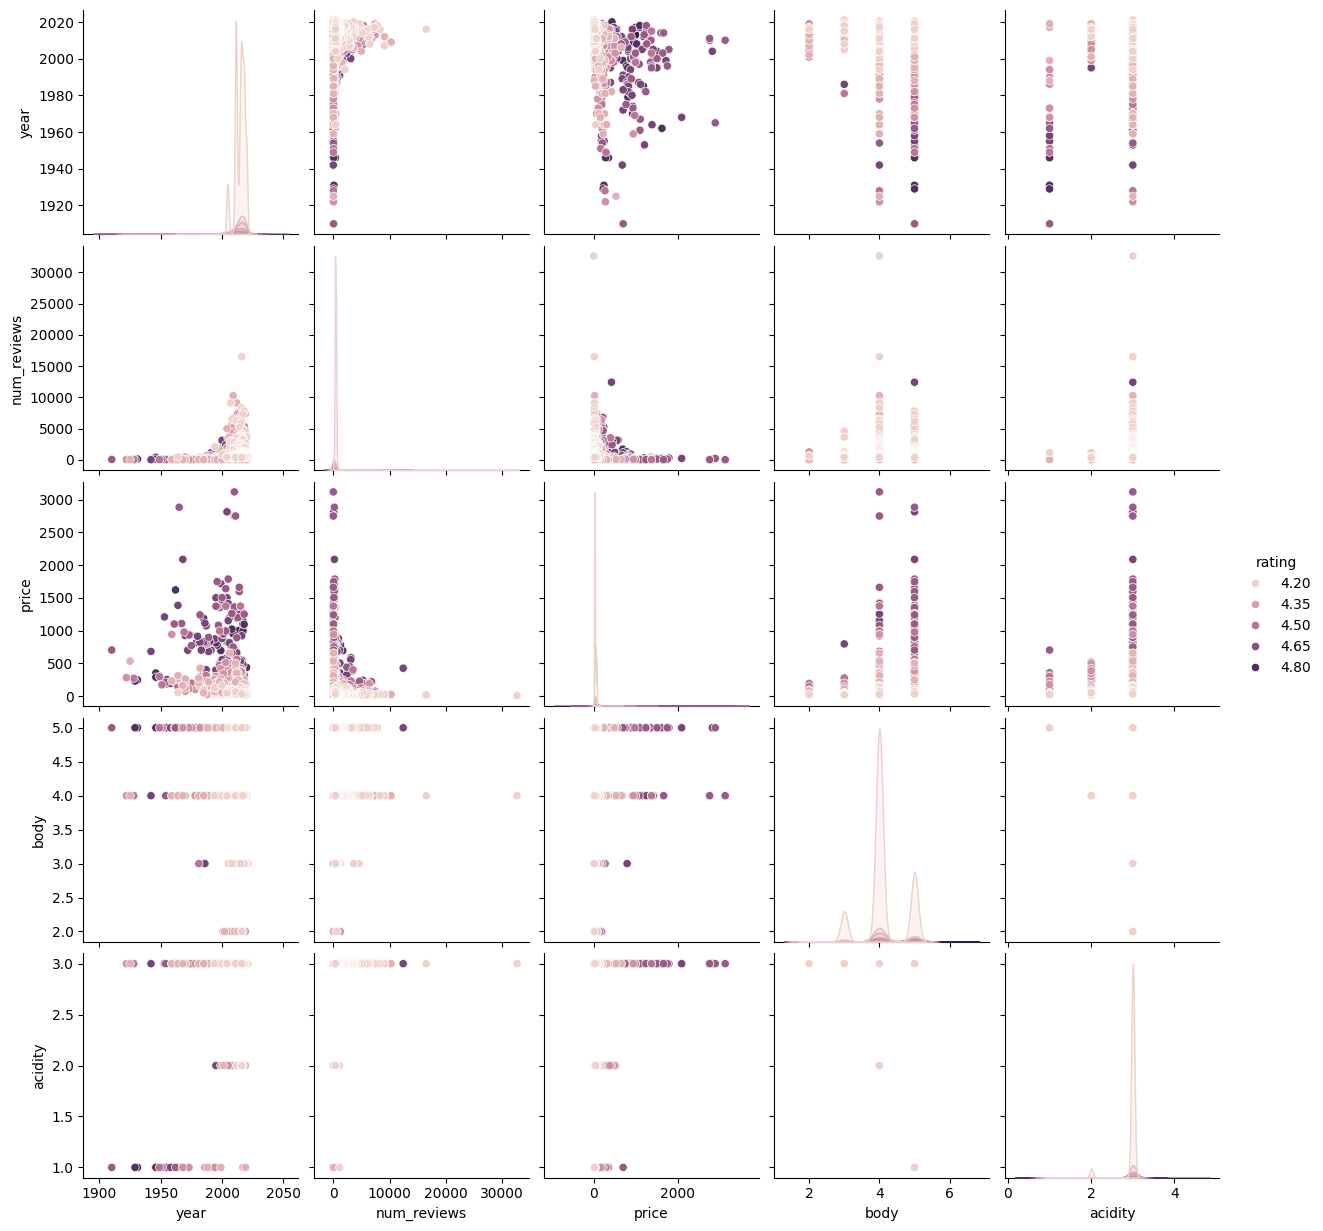

In [11]:
sns.pairplot(df,hue='rating')

<Axes: >

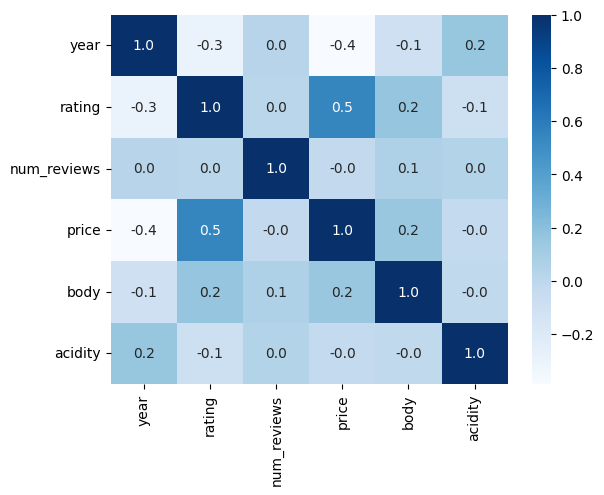

In [12]:
# Select only numerical features for correlation
numerical_df = df.select_dtypes(include=np.number)

# Calculate correlation and plot the heatmap
sns.heatmap(numerical_df.corr(), annot=True, cmap='Blues', fmt='.1f')

Scatterplot with 'Year', 'Price', 'Rating' and 'Number of Review'


<Axes: xlabel='year', ylabel='price'>

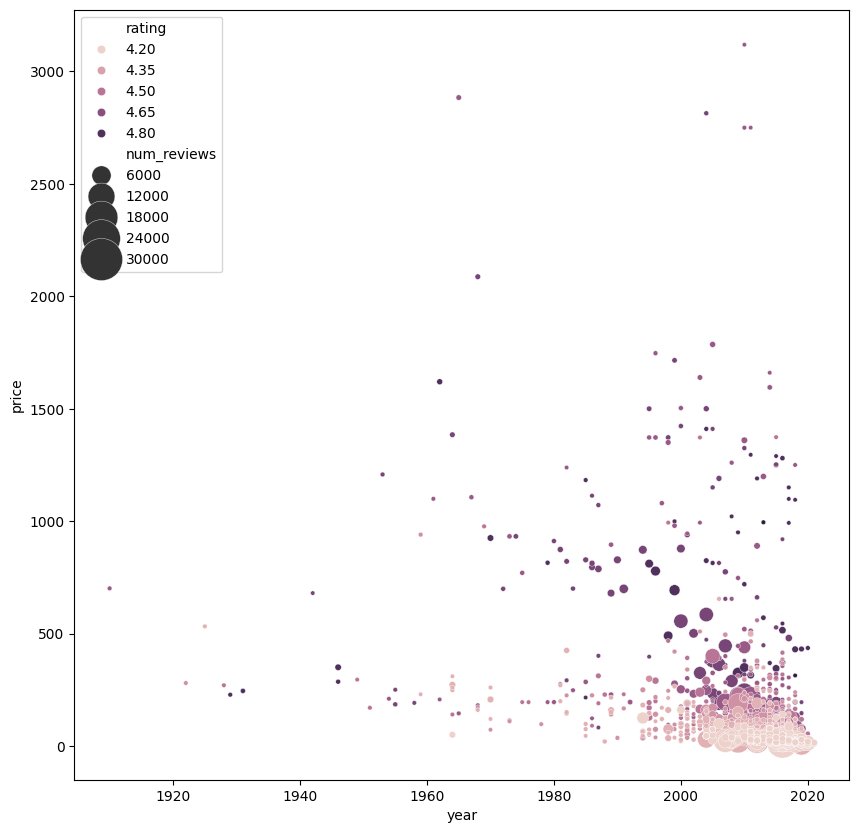

In [13]:
plt.figure(figsize=(10, 10))
sns.scatterplot(data=df, x='year', y='price',hue='rating',size='num_reviews',sizes=(10,1000))

Scatterplot with 'Body', 'Acidity', 'Rating' and 'Price'

<Axes: xlabel='body', ylabel='acidity'>

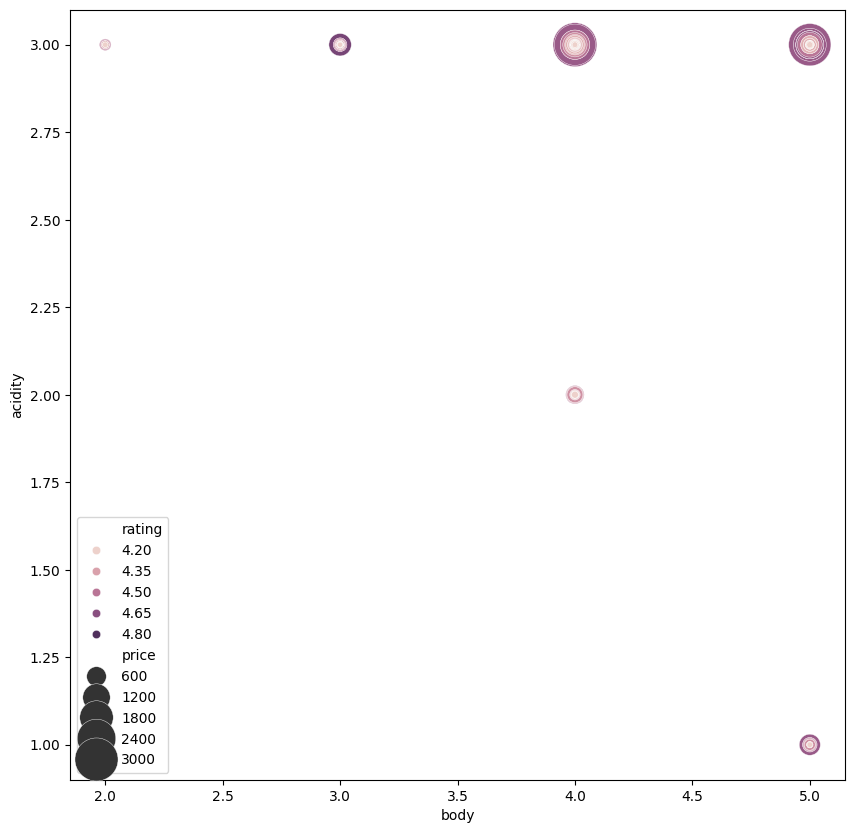

In [14]:
plt.figure(figsize=(10, 10))
sns.scatterplot(data=df, x='body', y='acidity',hue='rating',size='price',sizes=(10,1000))

Boxplot: Rating and Price

<Axes: xlabel='rating', ylabel='price'>

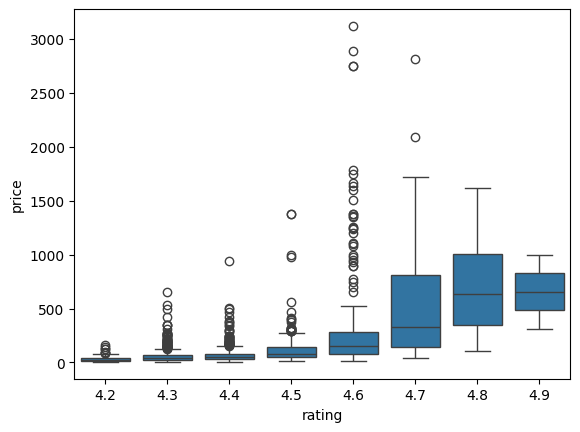

In [15]:
sns.boxplot(x=df["rating"],y=df['price'])

Boxplot: Rating and Number of Review

<Axes: xlabel='rating', ylabel='num_reviews'>

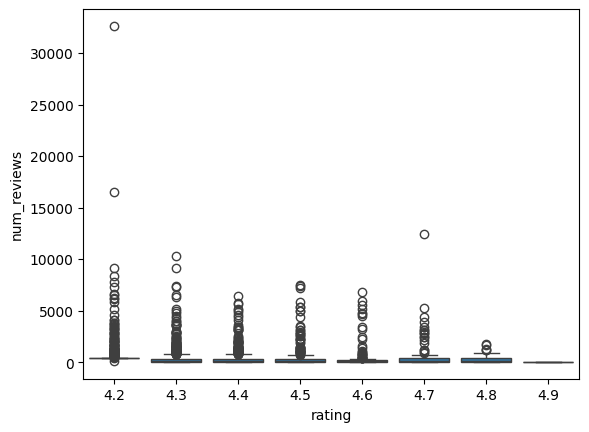

In [16]:
sns.boxplot(x=df["rating"],y=df['num_reviews'])

Boxplot: Rating and Body

<Axes: xlabel='rating', ylabel='body'>

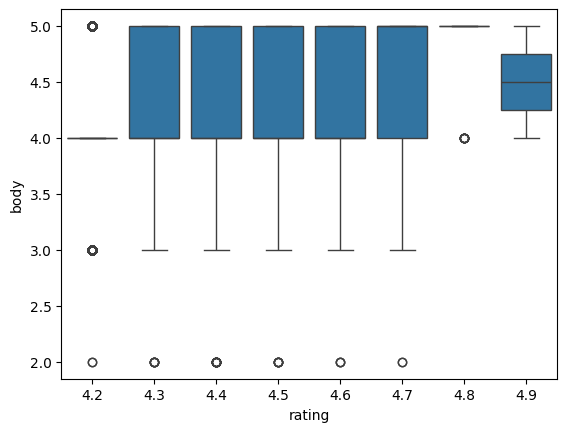

In [17]:
sns.boxplot(x=df["rating"],y=df['body'])

Boxplot: Rating and Acidity

<Axes: xlabel='rating', ylabel='acidity'>

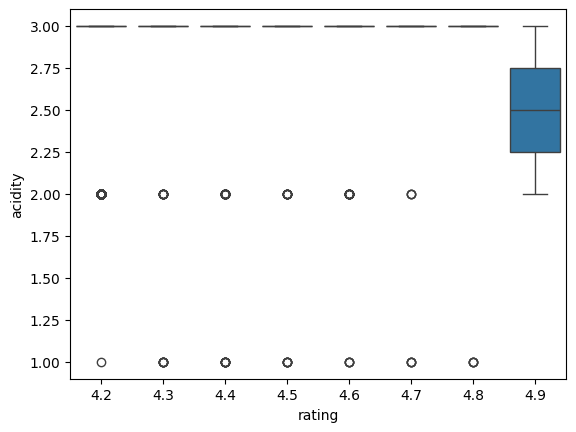

In [18]:
sns.boxplot(x=df["rating"],y=df['acidity'])

Barchart : Top 20 winery by average price

<Axes: xlabel='winery'>

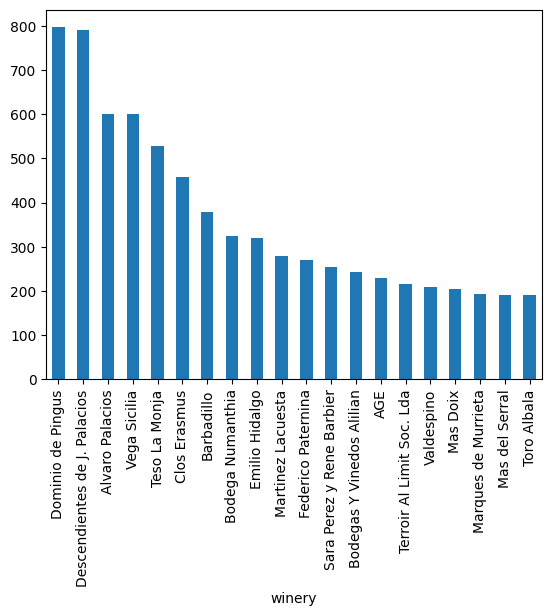

In [19]:
df.groupby('winery')['price'].mean().sort_values(ascending=False).head(20).plot.bar()

Price range of 'Dominio de Pingus' ( Highest average price winery )

<Axes: >

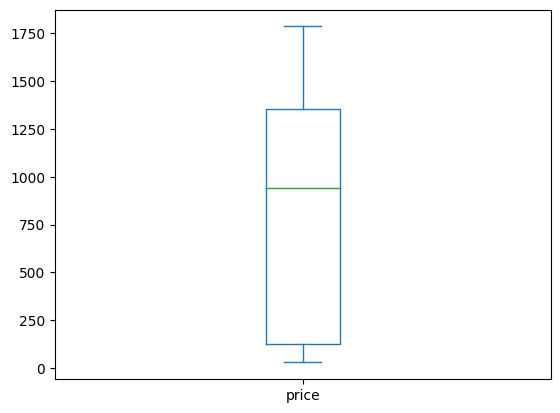

In [20]:
df_Dominio_de_Pingus=df[df['winery']=='Dominio de Pingus']
df_Dominio_de_Pingus['price'].plot.box()

Barchart : Top 20 winery by total number of wines

<Axes: xlabel='winery'>

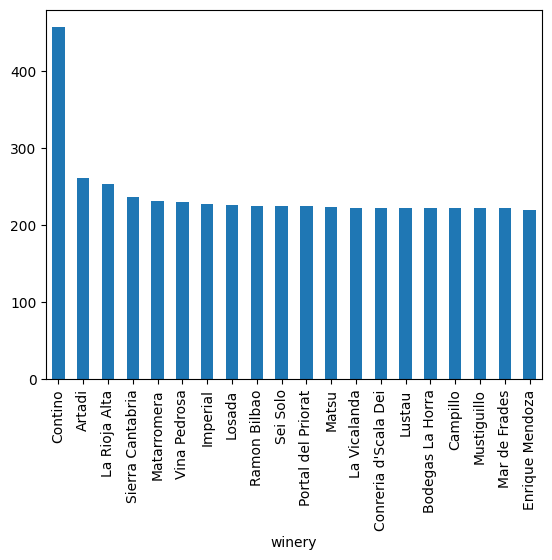

In [21]:
df.groupby('winery')['wine'].count().sort_values(ascending=False).head(20).plot.bar()

Price range of 'Contino' ( Largest number of wines)

<Axes: >

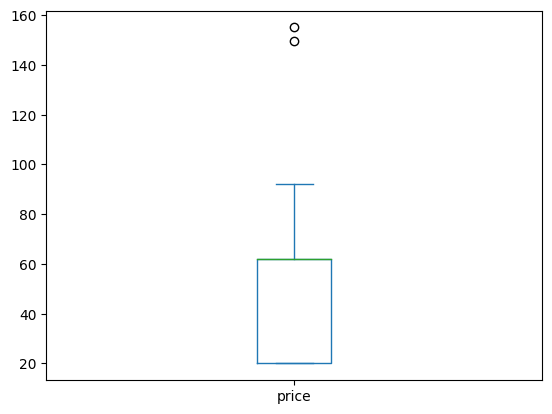

In [22]:
df_Contino=df[df['winery']=='Contino']
df_Contino['price'].plot.box()

Barchart : Top 20 regions by average price

<Axes: xlabel='region'>

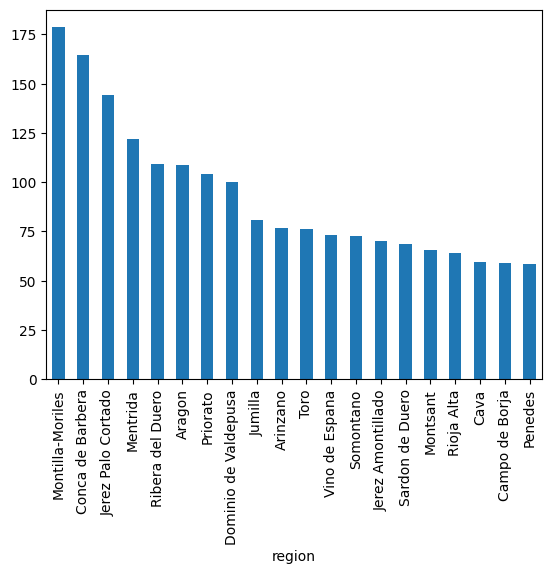

In [23]:
df.groupby('region')['price'].mean().sort_values(ascending=False).head(20).plot.bar()

Price range of 'Montilla-Moriles' ( Highest average price region )

<Axes: >

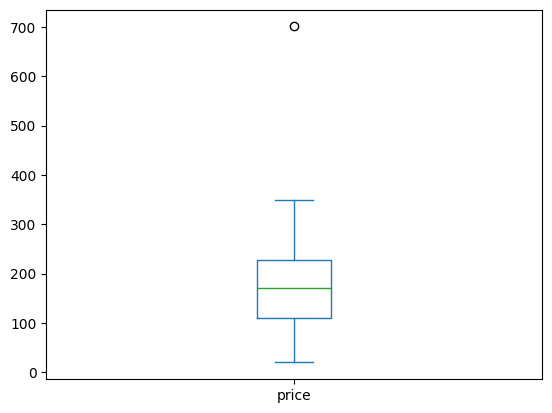

In [24]:
df_Montilla_Moriles=df[df['region']=="Montilla-Moriles"]
df_Montilla_Moriles['price'].plot.box()

Barchart : Top 20 typess by average price

<Axes: xlabel='type'>

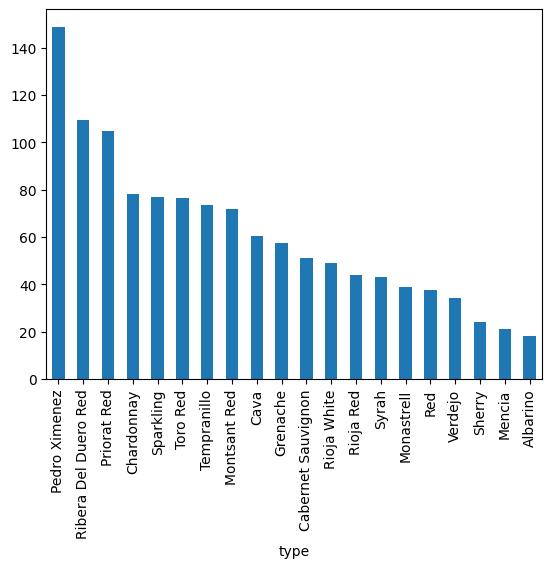

In [25]:
df.groupby('type')['price'].mean().sort_values(ascending=False).head(20).plot.bar()

Price range of 'Pedro Ximenez' ( Highest average price type )

<Axes: >

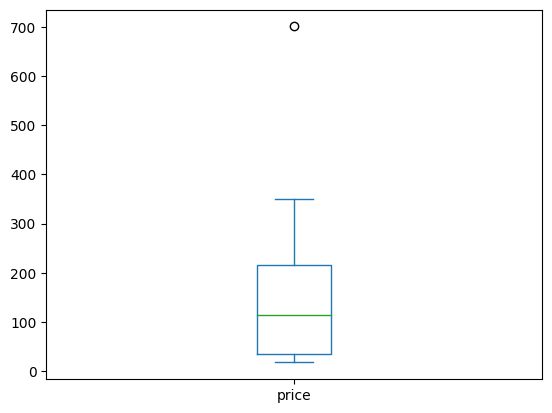

In [26]:
df_Pedro_Ximenez=df[df['type']=="Pedro Ximenez"]
df_Pedro_Ximenez['price'].plot.box()

# Clustering


In [27]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [28]:
df1=df.dropna() 

In [29]:
df2=df1.drop(['num_reviews','winery','wine','country','region','type'],axis=1)

In [30]:
df2 = scaler.fit_transform(df2)

In [31]:
from sklearn.cluster import KMeans

In [32]:
kmeans_model = KMeans(n_clusters=4, random_state=10).fit(df2)

In [33]:
labels = kmeans_model.labels_
labels

array([2, 2, 2, ..., 1, 0, 0])

In [34]:
color_codes = {0:'red', 1:'blue', 2:'yellow',3:'black'}

In [35]:
colors = [color_codes[x] for x in labels]

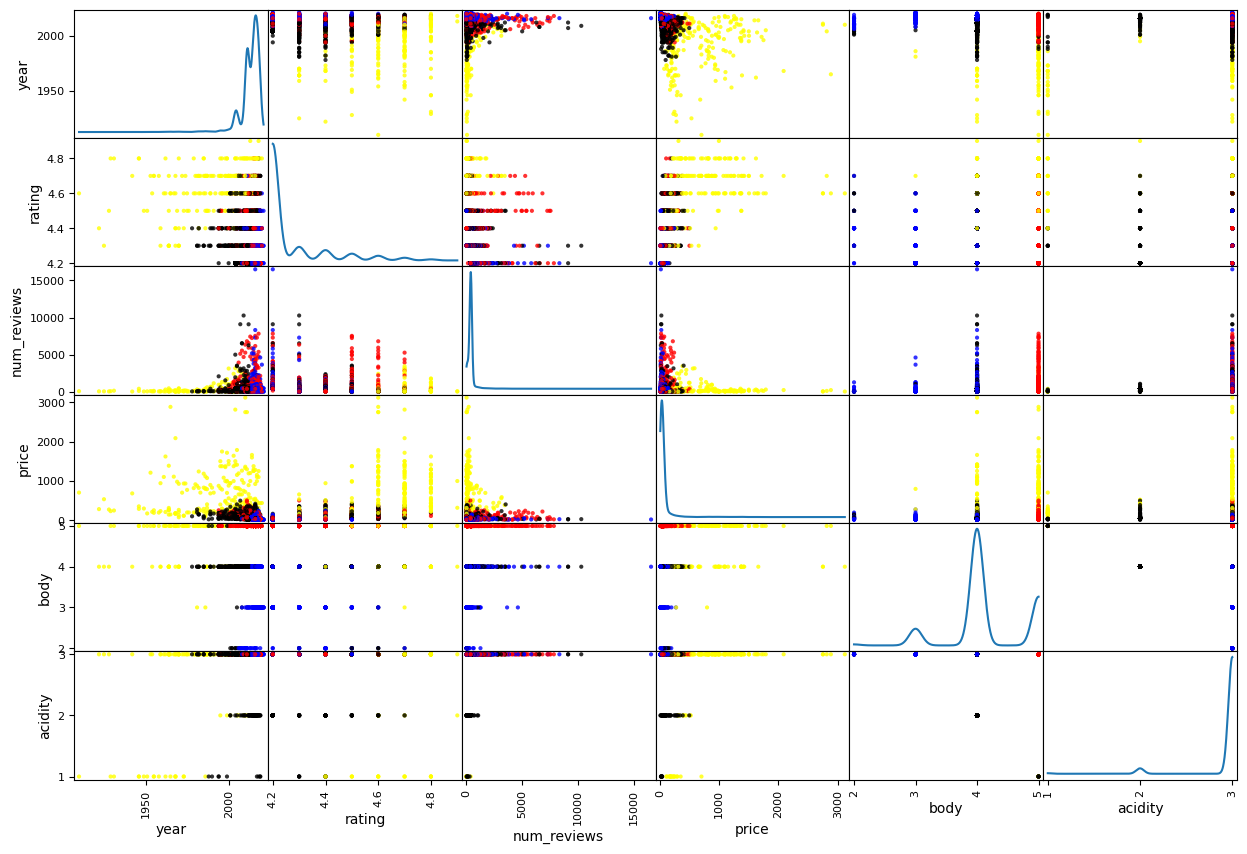

In [36]:
pd.plotting.scatter_matrix(df1[df1.columns[0:]], figsize=(15,10), color=colors, alpha=0.8, diagonal='kde')
plt.show()

In [37]:
from sklearn.metrics import silhouette_score

# Calculate the Silhouette Score
sil_score = silhouette_score(df2, labels)
print(f'Silhouette Score: {sil_score}')

Silhouette Score: 0.3027051135776212


In [38]:
df1['Cluster']=labels
df1.head()

,winery,wine,year,rating,num_reviews,country,region,price,type,body,acidity,Cluster
0,Teso La Monja,Tinto,2013.0,4.9,58,Espana,Toro,995.00,Toro Red,5.0,3.0,2
1,Artadi,Vina El Pison,2018.0,4.9,31,Espana,Vino de Espana,313.50,Tempranillo,4.0,2.0,2
2,Vega Sicilia,Unico,2009.0,4.8,1793,Espana,Ribera del Duero,324.95,Ribera Del Duero Red,5.0,3.0,2
3,Vega Sicilia,Unico,1999.0,4.8,1705,Espana,Ribera del Duero,692.96,Ribera Del Duero Red,5.0,3.0,2
4,Vega Sicilia,Unico,1996.0,4.8,1309,Espana,Ribera del Duero,778.06,Ribera Del Duero Red,5.0,3.0,2


<Axes: ylabel='Cluster'>

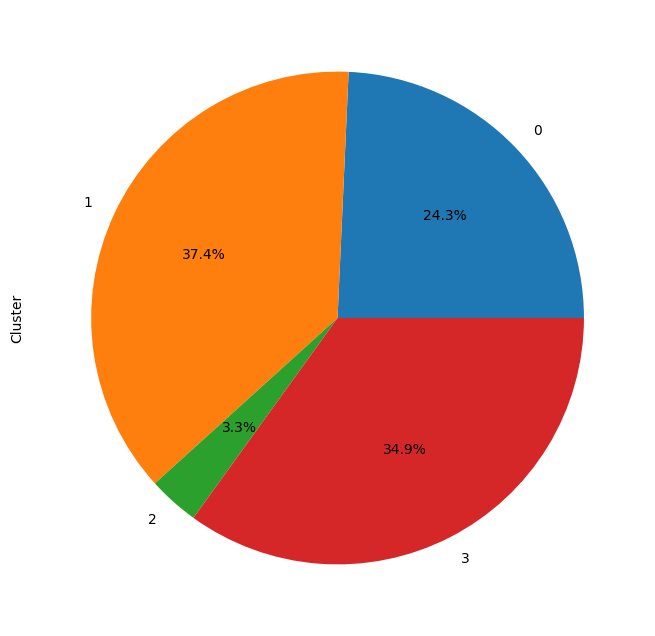

In [39]:
df1.groupby('Cluster')['Cluster'].count().plot.pie(autopct="%1.1f%%",figsize=(8,8))

In [40]:
df1['Cluster']=labels

In [41]:
df1.groupby('Cluster').describe().T

Cluster                      0             1            2             3
year        count  1474.000000   2272.000000   203.000000   2121.000000
            mean   2014.390095   2016.452905  1991.399015   2010.274399
            std       3.498297      1.612501    22.017171      4.738258
            min    1994.000000   2006.000000  1910.000000   1978.000000
            25%    2011.000000   2015.000000  1979.500000   2009.000000
            50%    2015.000000   2017.000000  1999.000000   2011.000000
            75%    2016.000000   2018.000000  2008.000000   2012.000000
            max    2020.000000   2021.000000  2020.000000   2019.000000
rating      count  1474.000000   2272.000000   203.000000   2121.000000
            mean      4.267571      4.223151     4.637931      4.258369
            std       0.125364      0.060754     0.136032      0.114046
            min       4.200000      4.200000     4.300000      4.200000
            25%       4.200000      4.200000     4.600000      4.200000
            50%       4.200000      4.200000     4.700000      4.200000
            75%       4.300000      4.200000     4.700000      4.300000
            max       4.800000      4.700000     4.900000      4.800000
num_reviews count  1474.000000   2272.000000   203.000000   2121.000000
            mean    530.080054    419.988556   315.339901    410.952852
            std     812.263074    515.864507   604.418981    511.256738
            min      25.000000     25.000000    25.000000     25.000000
            25%     388.000000    390.000000    51.500000    384.000000
            50%     400.000000    410.000000   102.000000    402.000000
            75%     412.000000    420.000000   234.500000    420.000000
            max    7825.000000  16505.000000  3437.000000  10273.000000
price       count  1474.000000   2272.000000   203.000000   2121.000000
            mean     52.911497     27.849191   730.636404     56.350737
            std      43.099851     22.120284   561.953306     49.552914
            min       7.900000      6.260000    72.000000      9.884034
            25%      31.630000     16.780000   287.430000     28.300000
            50%      37.900000     18.900000   559.020000     45.000000
            75%      64.500000     24.450000  1010.105000     61.940000
            max     498.614195    269.950000  3119.080000    495.000000
body        count  1474.000000   2272.000000   203.000000   2121.000000
            mean      5.000000      3.735915     4.640394      3.995285
            std       0.000000      0.466183     0.501230      0.143988
            min       5.000000      2.000000     3.000000      2.000000
            25%       5.000000      3.000000     4.000000      4.000000
            50%       5.000000      4.000000     5.000000      4.000000
            75%       5.000000      4.000000     5.000000      4.000000
            max       5.000000      4.000000     5.000000      5.000000
acidity     count  1474.000000   2272.000000   203.000000   2121.000000
            mean      3.000000      3.000000     2.778325      2.869873
            std       0.000000      0.000000     0.592965      0.348910
            min       3.000000      3.000000     1.000000      1.000000
            25%       3.000000      3.000000     3.000000      3.000000
            50%       3.000000      3.000000     3.000000      3.000000
            75%       3.000000      3.000000     3.000000      3.000000
            max       3.000000      3.000000     3.000000      3.000000

There are large gap in mean,minimum and maximum price among clusters. It may mean that clustering mainly depends on price. Wines in cluster 1 are in high price range.

So I tried finding where wines in cluster 1 are made. Are there any common features in wineries, regions or types?

<Axes: ylabel='region'>

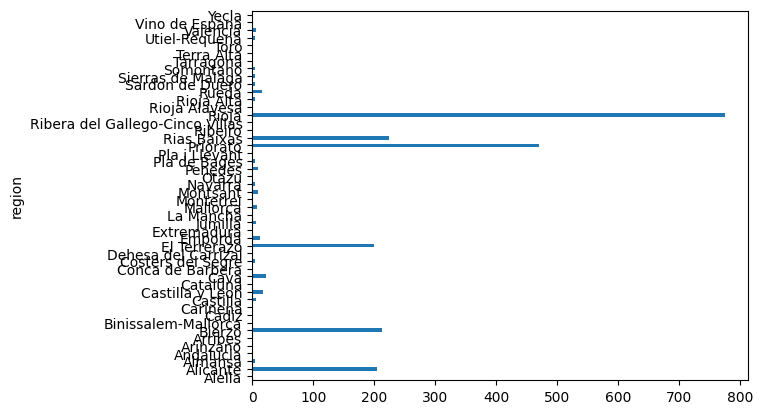

In [42]:
df1[df1['Cluster']==1].groupby('region')['wine'].count().plot.barh()

# PCA

In [43]:
df2=pd.DataFrame(df2) 

In [44]:
from sklearn.decomposition import PCA
pca = PCA(n_components=4)

X = pca.fit_transform(df2.values)
embed2 = pd.DataFrame(X)
embed2["Cluster"] = df1["Cluster"]
embed2.head()

,0,1,2,3,Cluster
0,6.554405,2.076827,-1.071667,3.219830,2.0
1,3.993797,-2.569449,0.195788,4.365281,2.0
2,3.974195,1.308211,-0.001961,1.732562,2.0
3,5.971072,1.285683,-0.662426,0.948101,2.0
4,6.479656,1.257865,-0.823299,0.688428,2.0


<Axes: xlabel='0', ylabel='1'>

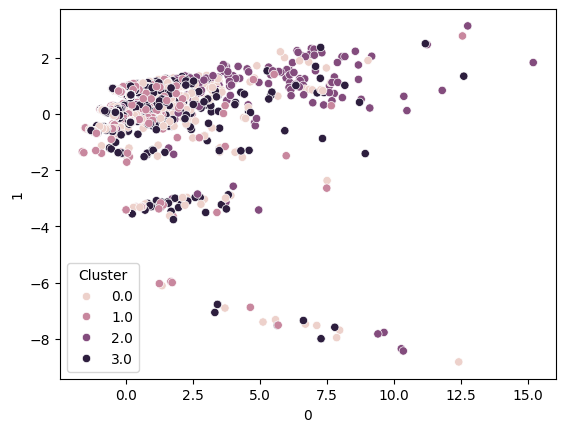

In [45]:
sns.scatterplot(data=embed2, x=0, y=1,hue="Cluster")

<Axes: >

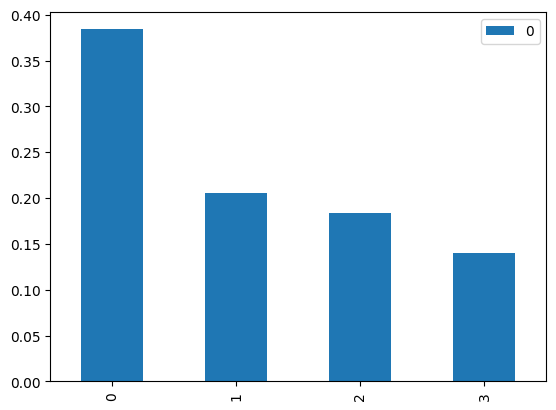

In [46]:
pd.DataFrame(pca.explained_variance_ratio_).plot.bar()

PC 0 to 3 explains almost over 90%.

# Case Study-Malaga

In [47]:
df_malaga=df1[(df1['region']=='Sierras de Malaga')|(df1['region']=='Malaga')|(df1['region']=='Montilla-Moriles')]

In [48]:
df_malaga

,winery,wine,year,rating,num_reviews,country,region,price,type,body,acidity,Cluster
14,Toro Albala,Don PX Convento Seleccion,1946.0,4.8,398,Espana,Montilla-Moriles,350.00,Pedro Ximenez,5.0,1.0,2
23,Toro Albala,Don PX Convento Seleccion,1931.0,4.8,139,Espana,Montilla-Moriles,244.85,Pedro Ximenez,5.0,1.0,2
26,Toro Albala,Don PX Pedro Ximenez,1946.0,4.8,103,Espana,Montilla-Moriles,285.86,Pedro Ximenez,5.0,1.0,2
32,Toro Albala,Don PX Convento Seleccion,1929.0,4.8,69,Espana,Montilla-Moriles,227.95,Pedro Ximenez,5.0,1.0,2
111,Toro Albala,Don PX Convento Seleccion,1955.0,4.7,117,Espana,Montilla-Moriles,185.00,Pedro Ximenez,5.0,1.0,2
137,Toro Albala,Don PX Pedro Ximenez,1955.0,4.7,50,Espana,Montilla-Moriles,250.00,Pedro Ximenez,5.0,1.0,2
140,Toro Albala,Don PX Convento Seleccion,1958.0,4.7,47,Espana,Montilla-Moriles,191.61,Pedro Ximenez,5.0,1.0,2
270,Toro Albala,Gines Liebana Pedro Ximenez,1910.0,4.6,70,Espana,Montilla-Moriles,701.05,Pedro Ximenez,5.0,1.0,2
274,Toro Albala,Don PX Seleccion,1965.0,4.6,65,Espana,Montilla-Moriles,144.99,Pedro Ximenez,5.0,1.0,2
322,Toro Albala,Don PX Seleccion,1962.0,4.6,34,Espana,Montilla-Moriles,207.00,Pedro Ximenez,5.0,1.0,2


In [49]:
df_malaga.describe()

,year,rating,num_reviews,price,body,acidity,Cluster
count,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000
mean,1972.964286,4.507143,105.392857,161.625000,4.821429,1.357143,2.071429
std,29.355398,0.178323,123.227384,144.609905,0.390021,0.780042,0.604218
min,1910.000000,4.200000,25.000000,18.900000,4.000000,1.000000,1.000000
25%,1954.000000,4.400000,36.750000,35.300000,5.000000,1.000000,2.000000
50%,1968.000000,4.450000,60.500000,167.475000,5.000000,1.000000,2.000000
75%,1994.000000,4.625000,103.250000,225.737500,5.000000,1.000000,2.000000
max,2020.000000,4.800000,555.000000,701.050000,5.000000,3.000000,3.000000


<Axes: ylabel='Cluster'>

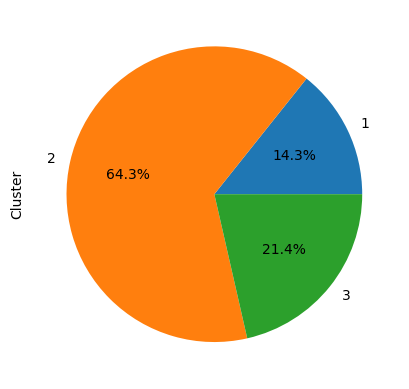

In [50]:
df_malaga.groupby('Cluster')['Cluster'].count().plot.pie(autopct="%1.1f%%")

In Malaga, wines in cluster 2 are 64.3% and wines in cluster 0 and 1 are 14.3%, aand 21.4% on cluster 3. Wines in north area of Malaga, 'Montilla-Moriles' are mainly in cluster 2 or 3. And wines in south area of Malaga, 'Sierras de Malaga' are in cluster 0.

In [51]:
df2

,0,1,2,3,4
0,0.006272,5.114491,5.604802,1.407978,0.217748
1,0.706096,5.114491,1.487011,-0.275715,-3.899793
2,-0.553587,4.315208,1.556195,1.407978,0.217748
3,-1.953235,4.315208,3.779802,1.407978,0.217748
4,-2.373129,4.315208,4.293997,1.407978,0.217748
...,...,...,...,...,...
6065,0.426166,-0.480492,-0.286509,-0.275715,0.217748
6066,0.706096,-0.480492,-0.305965,-0.275715,0.217748
6067,0.566131,-0.480492,-0.259501,-0.275715,0.217748
6068,-0.273658,-0.480492,-0.017509,1.407978,0.217748


In [52]:
# prompt: tampilkan 30 sample data dfl dan rapihkan tabelnya da

print(df1.sample(30).to_string())

                            winery                                wine    year  rating  num_reviews country               region   price                  type  body  acidity  Cluster
7475             Remirez de Ganuza                        Rioja Blanco  2017.0     4.2          421  Espana                Rioja   29.15           Rioja White   3.0      3.0        1
7143                        Artadi                          Valdegines  2016.0     4.2          398  Espana       Vino de Espana   48.96           Tempranillo   4.0      2.0        3
2697                   Matarromera                        Gran Reserva  2011.0     4.2          389  Espana     Ribera del Duero   64.50  Ribera Del Duero Red   5.0      3.0        0
6911                      Campillo                  Gran Reserva Rioja  2012.0     4.2          410  Espana                Rioja   22.99             Rioja Red   4.0      3.0        3
3731                 Mar de Frades  Rias Baixas Albarino Finca Valinas  2015.0     4.

In [53]:
# prompt: coba tampilkan hasil clustering pada semua region dengan pie chart

import plotly.express as px

# Assuming 'df1' is your DataFrame with the 'region' and 'Cluster' columns.
# Replace this with your actual DataFrame if necessary.

# Group the data by region and cluster to get counts for each cluster in each region.
region_cluster_counts = df1.groupby(['region', 'Cluster'])['Cluster'].count().unstack(fill_value=0)

# Create a list to hold all the pie charts.
pie_charts = []

# Loop through each region and create a pie chart for its clusters.
for region in region_cluster_counts.index:
    cluster_counts = region_cluster_counts.loc[region]
    fig = px.pie(values=cluster_counts, names=cluster_counts.index, title=f'Cluster Distribution in {region}')
    pie_charts.append(fig)

# Display all the pie charts (you can customize the display if needed)
for chart in pie_charts:
    chart.show()

In [54]:
import pickle

In [55]:
import pickle

# Simpan model clustering ke dalam file PKL
with open('modelClustering.pkl', 'wb') as file:
    pickle.dump(kmeans_model, file)

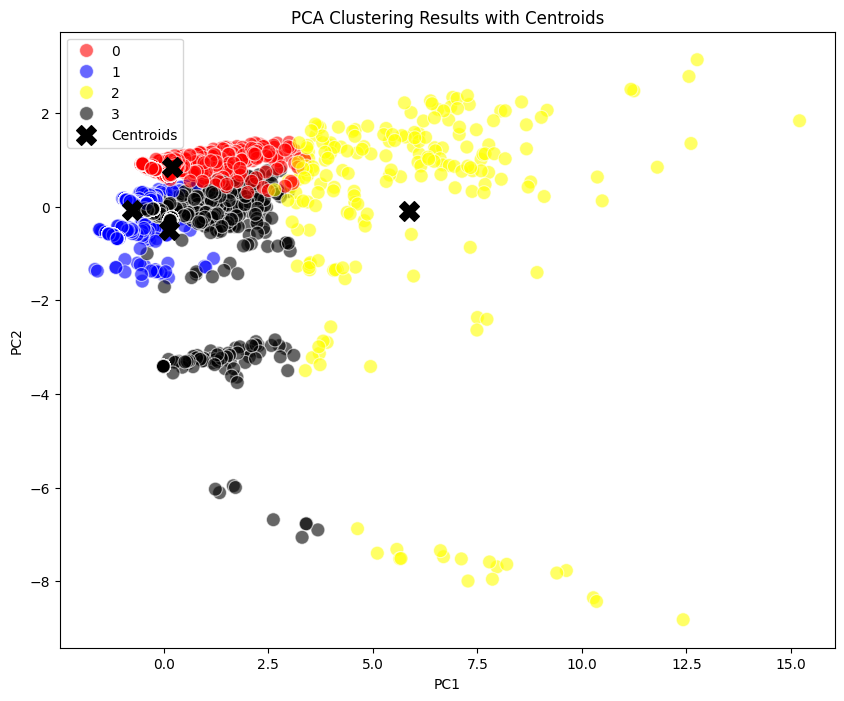

In [56]:
# Perform PCA on the original data
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df2)

# Create a DataFrame with the PCA results and cluster labels
pca_df = pd.DataFrame(pca_result, columns=['PC1', 'PC2'])
pca_df['Cluster'] = labels

# Calculate the centroids
centroids = kmeans_model.cluster_centers_
centroids_pca = pca.transform(centroids)

# Plot the scatter plot with centroids
plt.figure(figsize=(10, 8))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='Cluster', palette=color_codes, alpha=0.6, s=100)
plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1], c='black', s=200, marker='X', label='Centroids')
plt.title('PCA Clustering Results with Centroids')
plt.legend()
plt.show()

In [ ]:
Hasil dari proses clustering menggunakan algoritma KMeans menghasilkan 4 cluster. Berikut adalah deskripsi umum untuk masing-masing cluster:

1. **Cluster 0**: Cluster ini terdiri dari 252 data poin. Cluster ini didominasi oleh wine dengan harga yang lebih rendah dan rating yang lebih rendah dibandingkan dengan cluster lainnya. Wine dalam cluster ini cenderung memiliki body dan acidity yang lebih rendah.

2. **Cluster 1**: Cluster ini terdiri dari 204 data poin. Wine dalam cluster ini memiliki harga yang sedang dan rating yang cukup baik. Cluster ini juga memiliki variasi yang cukup besar dalam hal body dan acidity.

3. **Cluster 2**: Cluster ini terdiri dari 8 data poin. Wine dalam cluster ini memiliki harga yang sangat tinggi dan rating yang sangat baik. Cluster ini didominasi oleh wine dengan body dan acidity yang tinggi.

4. **Cluster 3**: Cluster ini terdiri dari 227 data poin. Wine dalam cluster ini memiliki harga yang bervariasi, namun cenderung lebih tinggi dibandingkan dengan cluster 0 dan 1. Rating wine dalam cluster ini juga cukup baik, dengan body dan acidity yang bervariasi.

Secara keseluruhan, clustering ini menunjukkan bahwa harga dan rating wine memiliki pengaruh yang signifikan dalam pembentukan cluster. Cluster 2, yang memiliki harga dan rating tertinggi, menunjukkan bahwa wine dengan kualitas terbaik cenderung dikelompokkan bersama. Sementara itu, cluster 0 dan 1 menunjukkan wine dengan harga dan rating yang lebih rendah.